You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

This project is a part of Mall Customer Segmentation Data competition held on Kaggle.

The goal of K means is to group data points into distinct non-overlapping subgroups. One of the major application of K means clustering is segmentation of customers to get a better understanding of them which in turn could be used to increase the revenue of the company.

In [1]:
#Importing the necessary libraries

import numpy as np

In [2]:
import pandas as pd

In [3]:
#importing the matplotlib for visualize the data

import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
#Reading the excel file

data=pd.read_csv("Mall_Customers.csv")

In [6]:
#Number of customers we have

print("Number of customers we have data for-" , len(data))

Number of customers we have data for- 200


In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
len(data)

200

In [9]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [12]:
import warnings
warnings.filterwarnings('ignore')

# Distribution of data

Text(0, 0.5, 'Count')

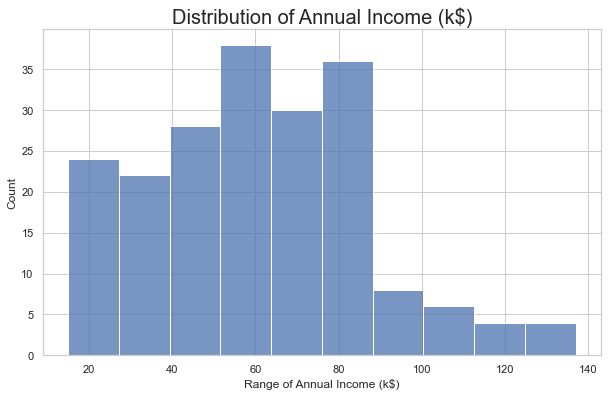

In [13]:
#Distribution of Annnual Income

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

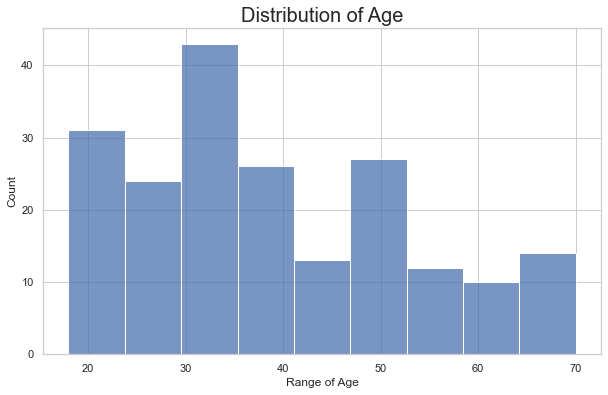

In [14]:
#Distribution of age

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

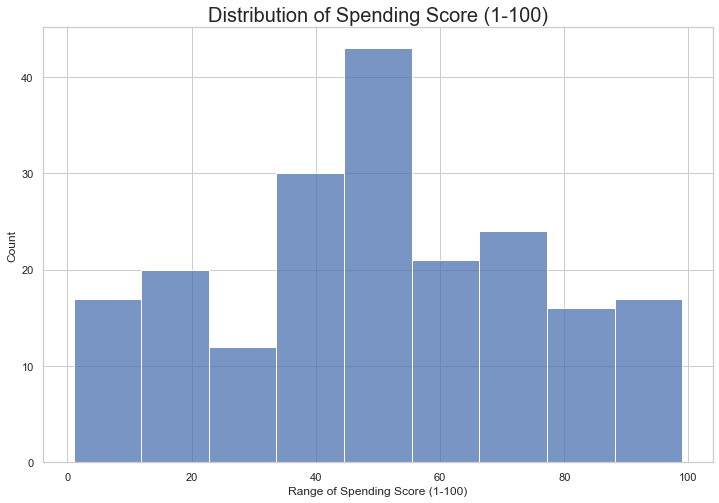

In [15]:
#Distribution of spending score

plt.figure(figsize=(12, 8))
sns.set(style = 'whitegrid')
sns.histplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

# Gender Analysis

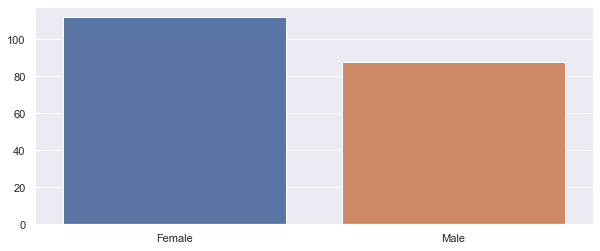

In [16]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

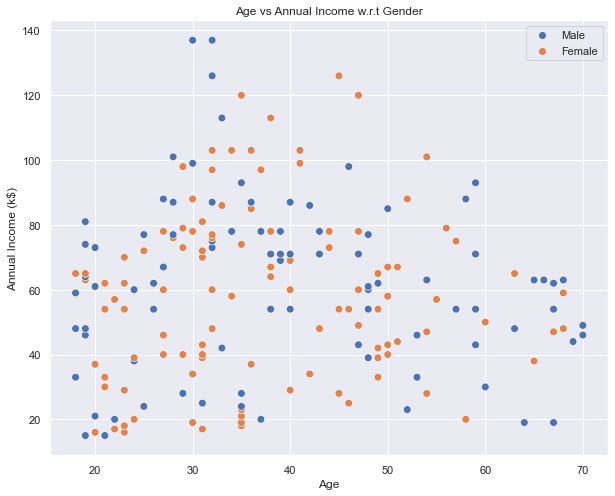

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Age' , y = 'Annual Income (k$)' , hue="Gender",data = data  ,s = 60 )
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

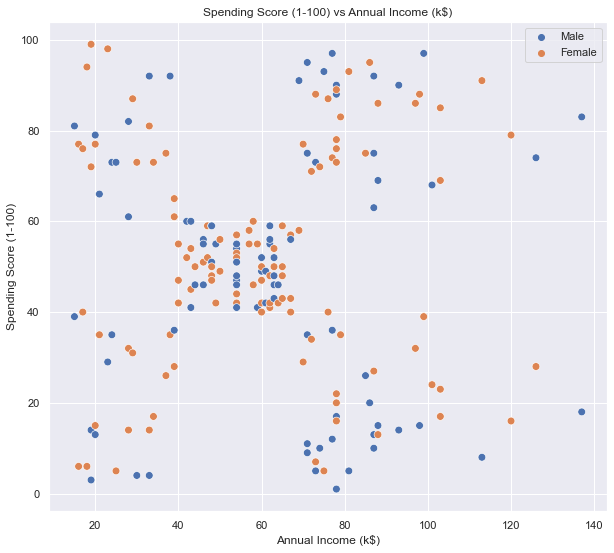

In [18]:
plt.figure(figsize=(10,9))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)'  , hue="Gender",data = data  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()

# Age Buckets

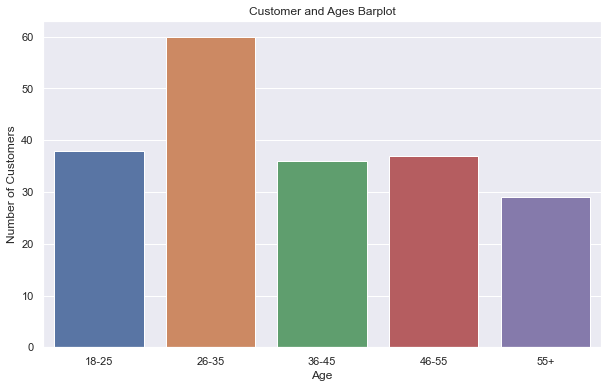

In [19]:
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

# Spending Score Buckets

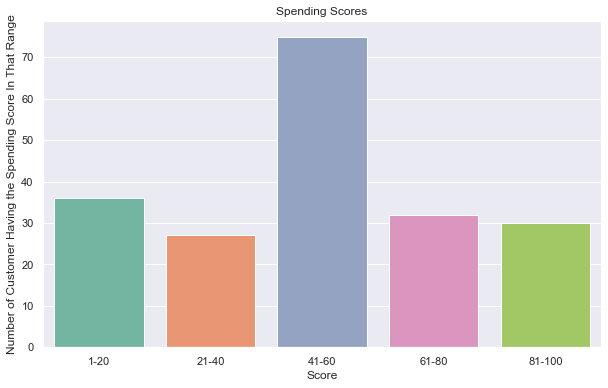

In [20]:
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="Set2")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Spending Score In That Range")
plt.show()

# Annual Income (1000 USD)

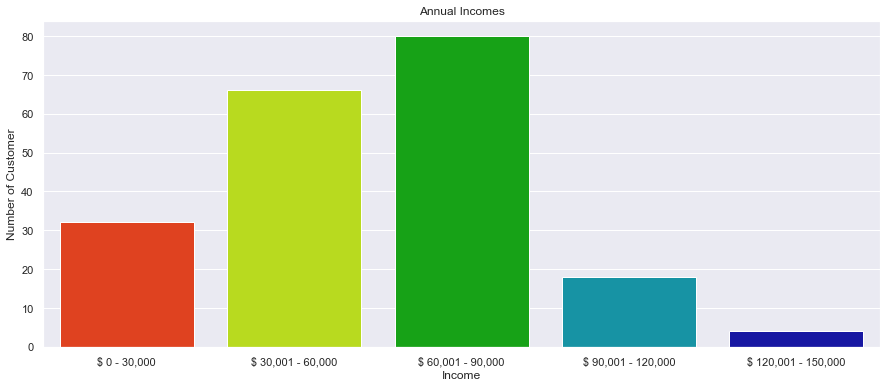

In [21]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

income_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [22]:
#Taking another look at the data

In [23]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Clustering based on 2 features

In [24]:
#We take just the Annual Income and Spending score
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [25]:
#The input data

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


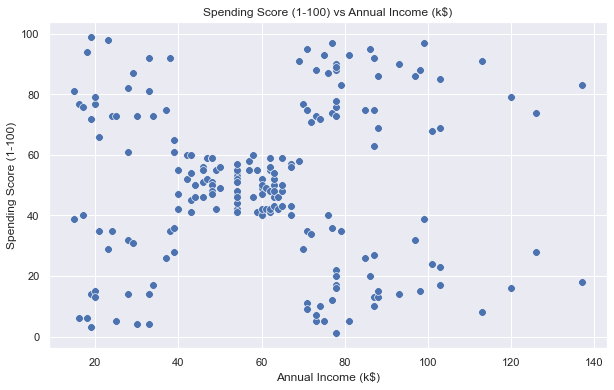

In [26]:
#Scatterplot of the input data

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

There seems to be some patterns in the data.

KMeans clustering.

KMeans is one of the simple but popular unsupervised learning algorithm. Here K indicates the number of clusters or classes the algorithm has to divide the data into. The algorithm starts with first group of randomly selected centroids, which are used as the beginning points for every cluster. It performs repetitive calculations to optimize the positions of the centroids.

For more information visit- https://en.wikipedia.org/wiki/K-means_clustering

In [27]:
#Importing KMeans from sklearn

from sklearn.cluster import KMeans

Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
Next, we choose the k for which WSS first starts to diminish. 

In [28]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

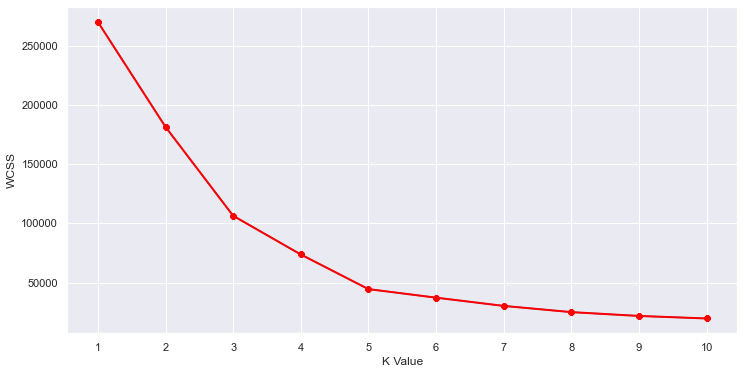

In [29]:

#The elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss)

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

In [30]:
#this is known as the elbow graph , the x axis being the number of clusters
#the number of clusters is taken at the elbow joint point
#this point is the point where making clusters is most relevant
#the numbers of clusters is kept at maximum

In [31]:
#Taking 5 clusters

km1=KMeans(n_clusters=5)

In [32]:
#Fitting the input data

km1.fit(X)

KMeans(n_clusters=5)

In [33]:
#predicting the labels of the input data

y=km1.predict(X)

In [34]:
#adding the labels to a column named label

df1["label"] = y

In [35]:
#The new dataframe with the clustering done

df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


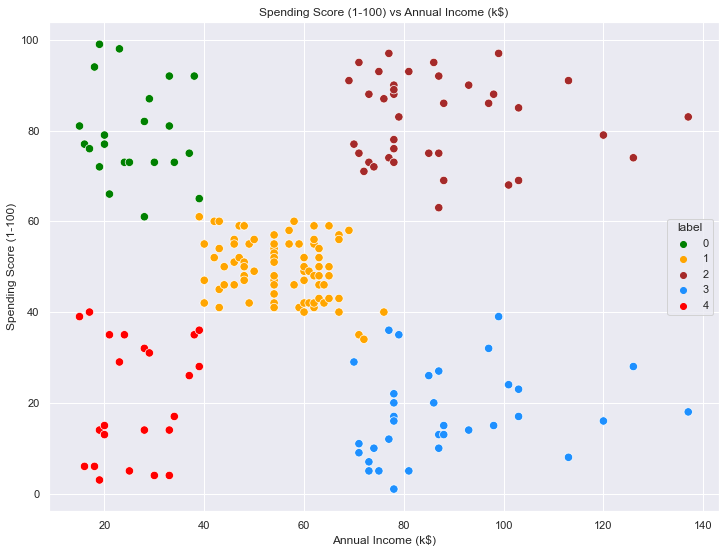

In [36]:
#Scatterplot of the clusters

plt.figure(figsize=(12,9))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 70 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

Now printing the customer ID according to the groups

In [37]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
--------------------------------------------


In [38]:
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 2nd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------


In [39]:
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 3rd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------


In [40]:
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 4th group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------


In [41]:
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 5th group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
--------------------------------------------


# Clustering on the basis of 3D data

In [42]:
#Now we shall take 3 input features

df2=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]


In [43]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
#Taking the features

X2=df2[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [45]:
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.


wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

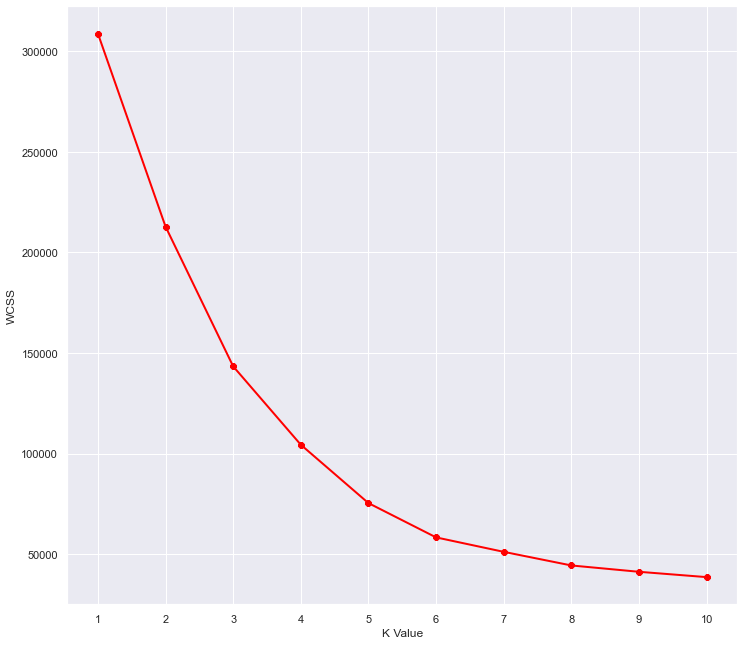

In [46]:
plt.figure(figsize=(12,11))    

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [47]:
#We choose the k for which WSS starts to diminish

km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df2["label"] = y2

In [48]:
#The new data

df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,6
2,3,Female,20,16,6,4
3,4,Female,23,16,77,6
4,5,Female,31,17,40,4


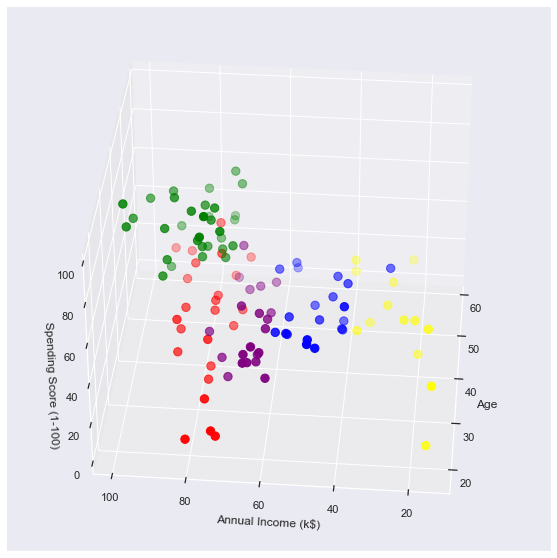

In [49]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=70)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=70)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=70)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=70)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=70)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Now printing the customerID according to the groups.

In [50]:
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 24
They are - [129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165 167
 169 171 173 175 177 179]
--------------------------------------------


In [51]:
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 2nd group= 20
They are - [28 44 46 48 49 50 52 53 59 62 66 69 70 76 78 79 82 85 88 89]
--------------------------------------------


In [52]:
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 3rd group= 21
They are - [ 92  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 123 125
 127 133 143]
--------------------------------------------


In [53]:
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 4th group= 32
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186]
--------------------------------------------
